# **Naive Bayes**

**Library**

In [48]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import drive

## **1. Persiapan Dataset**

In [49]:
import pandas as pd
import numpy as np

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set path untuk data
BASE_PATH = '/content/drive/MyDrive/Kuliah/Semester 4/KK/Code ginjal kronik/Naive Bayes/'
df_cdk = pd.read_csv(BASE_PATH + 'mentahan_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
df_cdk.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


# **2.Preprocessing Data**

In [52]:
import pandas as pd

def attributeSel(path):
    data = pd.read_csv(path, dtype=str)

    # Lihat nama kolom asli untuk debugging
    print("Kolom asli:", data.columns.tolist())

    row_drop = [1, 2]
    data = data.drop(index=row_drop)

    # Hapus spasi/tab di nama kolom
    data.columns = data.columns.str.strip()

    # Pilih kolom yang dibutuhkan
    data = data[['age', 'bp', 'bgr', 'sc', 'bu', 'classification']]

    # Hapus baris/kolom kosong total
    data = data.dropna(how='all')
    data = data.dropna(axis=1, how='all')

    # Ubah kolom ke numerik
    for col in ['age', 'bp', 'bgr', 'sc', 'bu']:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    # Tangani missing value
    for i in data.columns:
        if data[i].isnull().any():
            if data[i].dtype in ['float64', 'int64']:
                data[i] = data[i].fillna(round(data[i].mean()))
            else:
                data[i] = data[i].fillna(data[i].mode()[0])
    return data

# Jalankan preprocessing
df = attributeSel(BASE_PATH + 'mentahan_data.csv')

# Bersihkan classification
df['classification'] = df['classification'].astype(str).str.strip().str.lower()
classification_mapping = {
    'ckd': 'ckd',
    'notckd': 'notckd',
    'not ckd': 'notckd',
    'no ckd': 'notckd'
}
df['classification'] = df['classification'].replace(classification_mapping)

# Simpan ke Google Drive (file asli)
df.to_csv(BASE_PATH + 'data1.csv', index=False)

Kolom asli: ['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [53]:
df = pd.read_csv(BASE_PATH + 'data1.csv')
df.head()

,age,bp,bgr,sc,bu,classification
0,48.0,80.0,121.0,1.2,36.0,ckd
1,48.0,70.0,117.0,3.8,56.0,ckd
2,51.0,80.0,106.0,1.4,26.0,ckd
3,60.0,90.0,74.0,1.1,25.0,ckd
4,68.0,70.0,100.0,24.0,54.0,ckd


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             398 non-null    float64
 1   bp              398 non-null    float64
 2   bgr             398 non-null    float64
 3   sc              398 non-null    float64
 4   bu              398 non-null    float64
 5   classification  398 non-null    object 
dtypes: float64(5), object(1)
memory usage: 18.8+ KB


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics.pairwise import euclidean_distances
import warnings
warnings.filterwarnings('ignore')

# Load data (sesuaikan dengan path Anda)
df = pd.read_csv(BASE_PATH + 'data1.csv')

print("Data berhasil dimuat!")
print(f"Shape data: {df.shape}")
print("\nInfo data:")
df.head()

Data berhasil dimuat!
Shape data: (398, 6)

Info data:


,age,bp,bgr,sc,bu,classification
0,48.0,80.0,121.0,1.2,36.0,ckd
1,48.0,70.0,117.0,3.8,56.0,ckd
2,51.0,80.0,106.0,1.4,26.0,ckd
3,60.0,90.0,74.0,1.1,25.0,ckd
4,68.0,70.0,100.0,24.0,54.0,ckd


# **3.Klasifikasi Naive Bayes**

Pisahkan Fitur & Label + Encode Label

In [56]:
# Cek data dan missing values
print("Info dataset:")
print(df.info())
print(f"\nMissing values:\n{df.isnull().sum()}")

# Encode target variable
le = LabelEncoder()
df['classification'] = le.fit_transform(df['classification'])

print(f"\nDistribusi kelas:")
print(df['classification'].value_counts())

# Pisahkan features dan target
X = df.drop('classification', axis=1) # Fitur
y = df['classification'] # Target (ckd/notckd)

print(f"\nFeatures: {list(X.columns)}")
print(f"Shape X: {X.shape}, Shape y: {y.shape}")

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             398 non-null    float64
 1   bp              398 non-null    float64
 2   bgr             398 non-null    float64
 3   sc              398 non-null    float64
 4   bu              398 non-null    float64
 5   classification  398 non-null    object 
dtypes: float64(5), object(1)
memory usage: 18.8+ KB
None

Missing values:
age               0
bp                0
bgr               0
sc                0
bu                0
classification    0
dtype: int64

Distribusi kelas:
classification
0    248
1    150
Name: count, dtype: int64

Features: ['age', 'bp', 'bgr', 'sc', 'bu']
Shape X: (398, 5), Shape y: (398,)


Split Data Train dan Test

In [57]:
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Latih Model Naive Bayes

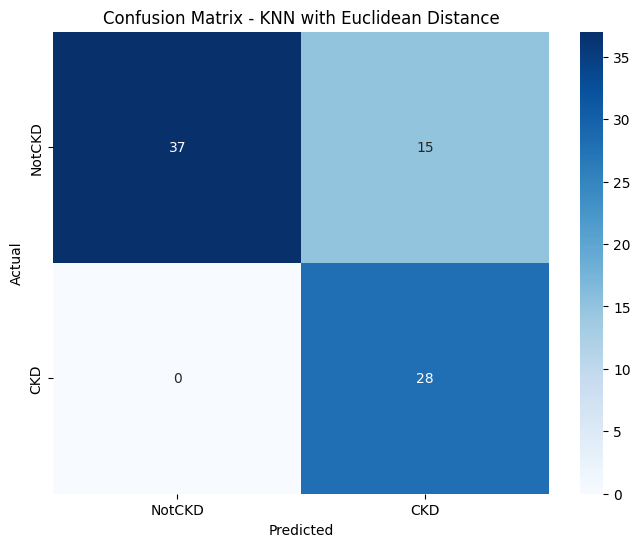

Confusion Matrix:
[[37 15]
 [ 0 28]]


In [58]:
# Buat dan latih model Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Prediksi
y_pred_nb = model_nb.predict(X_test)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['NotCKD', 'CKD'],
            yticklabels=['NotCKD', 'CKD'])
plt.title('Confusion Matrix - KNN with Euclidean Distance')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Confusion Matrix:")
print(cm)

In [59]:
# Menampilkan accuracy untuk KNN
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Akurasi (KNN):", accuracy_nb)
print("")

accuracy_nb_percentage = accuracy_nb * 100
print("KNN Accuracy", "{:.2f}%".format(accuracy_nb_percentage))


print("KNN Classification Report:")
print(classification_report(y_test, y_pred_nb))

Akurasi (KNN): 0.8125

KNN Accuracy 81.25%
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        52
           1       0.65      1.00      0.79        28

    accuracy                           0.81        80
   macro avg       0.83      0.86      0.81        80
weighted avg       0.88      0.81      0.82        80



In [60]:
print("="*50)
print("           HASIL KLASIFIKASI Naive Bayes")
print("                 dengan Gaussian")
print("="*50)

print(f"Dataset: Penyakit Ginjal Kronik")
print(f"Total data: {len(df)}")
print(f"Fitur: {len(X.columns)}")
print(f"Training: {len(X_train)} | Testing: {len(X_test)}")

print("\nModel Naive Bayes (GaussianNB):")
print(f"- Akurasi: {accuracy_nb_percentage:.2f}%")

print("="*50)

           HASIL KLASIFIKASI Naive Bayes
                 dengan Gaussian
Dataset: Penyakit Ginjal Kronik
Total data: 398
Fitur: 5
Training: 318 | Testing: 80

Model Naive Bayes (GaussianNB):
- Akurasi: 81.25%
